In [2]:
import pandas as pd

In [1]:

# Load the raw genotype data
with open("raw_genotypes.txt") as f:
    lines = [line.strip().split() for line in f]

# Parse into DataFrame
records = []
for line in lines:
    chrom, pos, ref, alt, *gts = line
    pos = int(pos)
    # Count 0s and 1s from genotypes
    derived_count = 0
    total_alleles = 0
    for gt in gts:
        if "|" in gt:
            alleles = gt.split("|")
        else:
            alleles = gt.split("/")
        if "." in alleles:
            continue
        derived_count += alleles.count("1")
        total_alleles += len(alleles)
    # Only keep if there's full data
    if total_alleles > 0:
        records.append([chrom, pos, derived_count, total_alleles])

# Convert to DataFrame and preview
sf2_df = pd.DataFrame(records, columns=["chrom", "pos", "derived", "sample_size"])


/tmp/ipykernel_2655880/2948186655.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
sf2_df

,chrom,pos,derived,sample_size
0,1,332,2,378
1,1,346,78,378
2,1,353,34,378
3,1,395,18,378
4,1,471,38,378
...,...,...,...,...
1448531,5,26790491,2,378
1448532,5,26790492,2,378
1448533,5,26790553,0,378
1448534,5,26790733,4,378


In [39]:
sf2_df.to_csv("modern.sf", sep="\t", index=False, header=False)

In [52]:
neutral = sf2_df[['pos', 'derived', 'sample_size']]

In [54]:
neutral.columns = ['position', 'x', 'n']

In [55]:
neutral

,position,x,n
0,332,2,378
1,346,78,378
2,353,34,378
3,395,18,378
4,471,38,378
...,...,...,...
1448531,26790491,2,378
1448532,26790492,2,378
1448533,26790553,0,378
1448534,26790733,4,378


In [56]:
neutral.to_csv("modern_all_chrom.tsv", sep="\t", index=False)

In [67]:
#readsnps: infile should have columns named position, x, and n (and optionally folded


In [ ]:
pd.read_Csv()

In [75]:
saved_files = []
for chrom, group in sf2_df.groupby("chrom"):
    group_sorted = group.sort_values("pos")
    output_file = f"sweepfinder2_chr{chrom}.sf"
    
    group_sorted = group_sorted[["pos", "derived", "sample_size"]]
    group_sorted.columns = ["position", "x", "n"]
    group_sorted.to_csv(
        output_file, sep="\t", index=False
    )
    saved_files.append(output_file)

saved_files

['sweepfinder2_chr1.sf',
 'sweepfinder2_chr2.sf',
 'sweepfinder2_chr3.sf',
 'sweepfinder2_chr4.sf',
 'sweepfinder2_chr5.sf']

In [43]:
pd.read_csv('sweepfinder2_chr5.sf', sep = '\t'bb)

,70,0,378
0,75,0,378
1,102,0,378
2,116,0,378
3,135,6,378
4,140,2,378
...,...,...,...
330909,26790491,2,378
330910,26790492,2,378
330911,26790553,0,378
330912,26790733,4,378


In [57]:
pd.read_csv('modern_all_chrom.tsv',sep = '\t')

,position,x,n
0,332,2,378
1,346,78,378
2,353,34,378
3,395,18,378
4,471,38,378
...,...,...,...
1448531,26790491,2,378
1448532,26790492,2,378
1448533,26790553,0,378
1448534,26790733,4,378


In [ ]:
# Step 1: Generate the empirical background SFS from your data.
SweepFinder2/SweepFinder2 -f modern_all_chrom.tsv genomewide.spect


## from the manual 
./SweepFinder2 –f CombinedFreqFile SpectFile

In [ ]:
SweepFinder2/SweepFinder2 -l 100 modern_all_chrom.tsv genomewide.spect sweepfinder_output.sf2


In [ ]:
SweepFinder2/SweepFinder2 -l 100 modern_all_chrom.tsv genomewide.spect sweepfinder_output.sf2

In [59]:
pd.read_csv('sweepfinder_output.sf2', sep = '\t')

,location,LR,alpha
0,7.000000e+01,2.298214,0.080999
1,3.051863e+04,0.000000,1.246543
2,6.096725e+04,0.000000,0.205997
3,9.141588e+04,0.000000,0.603626
4,1.218645e+05,0.000000,7.965450
...,...,...,...
93,2.831792e+06,0.000000,0.390578
94,2.862241e+06,0.047026,0.214523
95,2.892690e+06,0.000000,1.416687
96,2.923138e+06,0.000000,0.221581


In [ ]:
SweepFinder2 -l 1000 chr1.tsv chr1.spect chr1.sf2


In [ ]:
SweepFinder2 -l 1000 chr2.tsv genomewide.spect chr2.sf2


In [1]:
import subprocess
import datetime

In [20]:


# Path where SLURM logs and scripts go
sbatch_path = "/carnegie/nobackup/scratch/tbellagio/selection_scan/sweepfinder/"
batch_script_list = []

# Timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# SweepFinder2-specific version with a predificned neutral sfs and run every 1000 snps
for chr_num in range(1, 6):
    sbatch_filename = f"sbatch_sweepfinder2_chr{chr_num}.sh"
    log_filename = f"{sbatch_path}/sweepfinder2_chr{chr_num}_{timestamp}_output.txt"
    
    sbatch_command = f"""#!/bin/bash
#SBATCH --job-name="sf2_chr{chr_num}"
#SBATCH --time=48:00:00
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=1
#SBATCH --mem=4G
#SBATCH --output={log_filename}
#SBATCH --mail-user=tbellagio@carnegiescience.edu
#SBATCH --mail-type=FAIL

cd {sbatch_path}
pwd

echo "Running SweepFinder2 on chromosome {chr_num}..."

SweepFinder2/SweepFinder2 -sg 100 sweepfinder2_chr{chr_num}.sf sweepfinder_chr{chr_num}_100w_nback.sf2
"""

    # Save batch script
    with open(sbatch_filename, 'w') as f:
        f.write(sbatch_command)

    batch_script_list.append(sbatch_filename)


In [ ]:
## putting or not teh neutral base don the whole genome didnt change anything 
SweepFinder2/SweepFinder2 -sg 1000 sweepfinder2_chr{chr_num}.sf sweepfinder_chr{chr_num}_1000w_nback.sf2


In [21]:
batch_script_list

['sbatch_sweepfinder2_chr1.sh',
 'sbatch_sweepfinder2_chr2.sh',
 'sbatch_sweepfinder2_chr3.sh',
 'sbatch_sweepfinder2_chr4.sh',
 'sbatch_sweepfinder2_chr5.sh']

In [121]:
sbatch_filename

'sbatch_sweepfinder2_chr5.sh'

In [78]:
pd.read_csv('sweepfinder2_chr1.sf',sep = '\t')

,position,x,n
0,332,2,378
1,346,78,378
2,353,34,378
3,395,18,378
4,471,38,378
...,...,...,...
379491,30417922,360,378
379492,30417934,4,378
379493,30418223,360,378
379494,30418238,360,378


In [123]:
subprocess.run(['sbatch', batch_script_list[0]])

Submitted batch job 68430


CompletedProcess(args=['sbatch', 'sbatch_sweepfinder2_chr1.sh'], returncode=0)

In [22]:
for i in range(len(batch_script_list)):
    subprocess.run(['sbatch', batch_script_list[i]])

Submitted batch job 68499
Submitted batch job 68500
Submitted batch job 68501
Submitted batch job 68502
Submitted batch job 68503


In [ ]:
# this is the most basic way to run sweepfinder
SweepFinder2 -l <grid_spacing> <SNP_file.sf> <spectrum_file> <output_file>


In [ ]:
## other way is to incorporate recombination maps 
SweepFinder2 -lr <grid_spacing> <SNP_file.sf> <spectrum_file> <recomb_file> <output_file>


In [4]:
import pandas as pd
import glob

# List all SweepFinder2 output files
files = sorted(glob.glob("sweepfinder_chr*100w_nback.sf2"))

In [5]:
files

['sweepfinder_chr1_100w_nback.sf2',
 'sweepfinder_chr2_100w_nback.sf2',
 'sweepfinder_chr3_100w_nback.sf2',
 'sweepfinder_chr4_100w_nback.sf2',
 'sweepfinder_chr5_100w_nback.sf2']

In [6]:

# Empty list to store dataframes
dfs = []

for f in files:
    # Extract chromosome number from filename
    chrom = f.split("chr")[1][0]

    # Read file, assuming tab-separated and no header
    df = pd.read_csv(f, sep='\t')
    df["chrom"] = chrom  # Add chromosome column
    dfs.append(df)

# Concatenate all
combined_df = pd.concat(dfs)


In [7]:
combined_df

,location,LR,alpha,chrom
0,3.320000e+02,0.000000,1200.000000,1
1,4.320004e+02,0.000000,0.324321,1
2,5.320008e+02,0.000000,1.500144,1
3,6.320011e+02,0.000346,0.098777,1
4,7.320015e+02,0.000000,5.995429,1
...,...,...,...,...
53849,5.384995e+06,0.000000,0.090310,5
53850,5.385095e+06,0.000000,0.365024,5
53851,5.385195e+06,0.000000,0.914225,5
53852,5.385295e+06,0.000000,0.106076,5


In [33]:
## create a recombination map from the genetic and phisical map?

In [8]:
import os

In [9]:
# Load your genetic map (example columns: pos_bp, cM)
genmap = pd.read_csv("../selection_scan/genetic_map.csv")

In [10]:
genmap

,chr,bp,cM
0,1,48181,5.000000e-08
1,1,77458,1.000000e-07
2,1,88300,1.500000e-07
3,1,128116,3.500000e-07
4,1,137545,4.000000e-07
...,...,...,...
18275,5,26904731,1.032172e+02
18276,5,26907724,1.032172e+02
18277,5,26919211,1.032172e+02
18278,5,26923775,1.035979e+02


In [11]:

genmap = genmap.sort_values(by=["chr", "bp"]).reset_index(drop=True)

# Convert cM to Morgans
genmap["morgan"] = genmap["cM"] / 100.0

# Compute recombination rate per base pair per chromosome
def compute_recomb_rate(df):
    df = df.sort_values("bp").copy()
    df["recomb_rate"] = df["morgan"].diff() / df["bp"].diff()
    df.iloc[0, df.columns.get_loc("recomb_rate")] = 0  # First entry has no prior
    return df

genmap_rates = genmap.groupby("chr").apply(compute_recomb_rate).reset_index(drop=True)

# Filter out negative or NaN recombination rates
genmap_rates = genmap_rates[genmap_rates["recomb_rate"] >= 0]



/tmp/ipykernel_3890537/3443757944.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genmap_rates = genmap.groupby("chr").apply(compute_recomb_rate).reset_index(drop=True)


In [97]:
genmap_rates['recomb_rate'].describe()

count    1.828000e+04
mean     5.318369e-08
std      7.408055e-07
min      0.000000e+00
25%      1.157022e-13
50%      2.753304e-13
75%      8.264462e-13
max      5.027677e-05
Name: recomb_rate, dtype: float64

In [105]:
genmap_rates[genmap_rates['recomb_rate']!=0]['recomb_rate'].describe()

count    1.810600e+04
mean     5.369479e-08
std      7.443384e-07
min      1.667868e-15
25%      1.184571e-13
50%      2.801121e-13
75%      8.353637e-13
max      5.027677e-05
Name: recomb_rate, dtype: float64

In [101]:
genmap_rates.iloc[1:, :]['recomb_rate'].describe()

count    1.827900e+04
mean     5.318660e-08
std      7.408257e-07
min      0.000000e+00
25%      1.157106e-13
50%      2.753304e-13
75%      8.264462e-13
max      5.027677e-05
Name: recomb_rate, dtype: float64

In [90]:


# Compute recombination rate in cM/Mb
genmap['recomb_rate'] = genmap['cM'].diff() / genmap['bp'].diff()

# Optional: convert to Morgans per bp
genmap['recomb_rate_morgan'] = genmap['recomb_rate'] * 0.01

# Drop first row (NaN from diff)
genmap = genmap.dropna()

# Save for SweepFinder2 (position + recombination rate per bp)
genmap[['bp', 'recomb_rate_morgan']]#.to_csv("chr1_rec_map.tsv", sep="\t", index=False, header=False)


/tmp/ipykernel_2655880/1481896412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genmap['recomb_rate'] = genmap['cM'].diff() / genmap['bp'].diff()
/tmp/ipykernel_2655880/1481896412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genmap['recomb_rate_morgan'] = genmap['recomb_rate'] * 0.01


,bp,recomb_rate_morgan
2,88300,4.611695e-14
3,128116,5.023106e-14
4,137545,5.302789e-14
5,153232,3.187353e-14
6,163569,9.673987e-14
...,...,...
18275,26904731,2.272727e-13
18276,26907724,3.341130e-13
18277,26919211,8.705493e-14
18278,26923775,8.342809e-07


In [12]:
files = sorted(glob.glob("sweepfinder_chr*.sf2"))

In [13]:
files

['sweepfinder_chr1.sf2',
 'sweepfinder_chr1_1000w_nback.sf2',
 'sweepfinder_chr1_100w_nback.sf2',
 'sweepfinder_chr2.sf2',
 'sweepfinder_chr2_1000w_nback.sf2',
 'sweepfinder_chr2_100w_nback.sf2',
 'sweepfinder_chr3.sf2',
 'sweepfinder_chr3_1000w_nback.sf2',
 'sweepfinder_chr3_100w_nback.sf2',
 'sweepfinder_chr4.sf2',
 'sweepfinder_chr4_1000w_nback.sf2',
 'sweepfinder_chr4_100w_nback.sf2',
 'sweepfinder_chr5.sf2',
 'sweepfinder_chr5_1000w_nback.sf2',
 'sweepfinder_chr5_100w_nback.sf2']

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load gene table ===
genes_df = pd.read_csv('../genes_df.csv')

# === Load and concatenate SweepFinder2 results ===
chroms = ['1', '2', '3', '4', '5']
sweep_all = []
offset = 0
chrom_lengths = {}

for chrom in chroms:
    
    df = pd.read_csv(f'sweepfinder_chr{chrom}_100w_nback.sf2', sep='\t')
    df.columns = ['location', 'LR', 'alpha']
    df['chrom'] = chrom
    df['pos_cum'] = df['location'] + offset

    chrom_len = df['location'].max()
    chrom_lengths[chrom] = chrom_len
    offset += chrom_len

    sweep_all.append(df)


In [17]:
sweep_df = pd.concat(sweep_all, ignore_index=True)

In [18]:
#sweep_df = sweep_df[sweep_df['alpha'] != 1200]

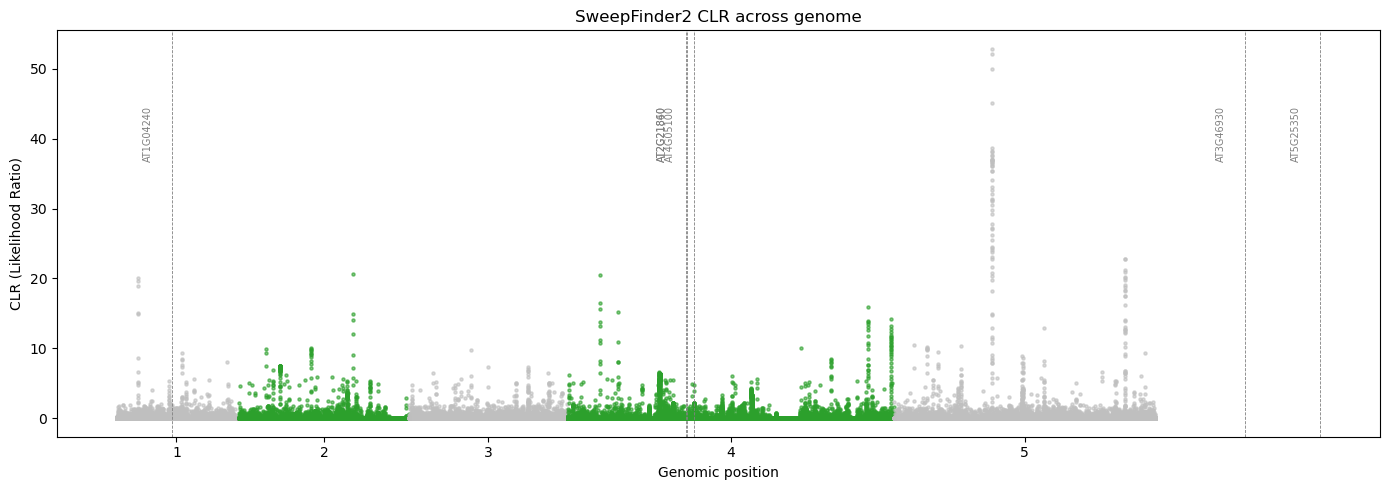

In [19]:

plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(sweep_df.groupby('chrom')):
    plt.scatter(group['pos_cum'], group['LR'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {chrom}')

# X-axis ticks by chromosome midpoint
xticks = sweep_df.groupby('chrom')['pos_cum'].median()
xtick_labels = sweep_df.groupby('chrom')['chrom'].first()
plt.xticks(ticks=xticks, labels=xtick_labels)

plt.xlabel('Genomic position')
plt.ylabel('CLR (Likelihood Ratio)')
plt.title('SweepFinder2 CLR across genome')
plt.tight_layout()

# === Annotate gene positions ===
for _, row in genes_df.iterrows():
    chrom = str(row['chrom'])
    gene_start = row['start']
    gene_end = row['end']
    gene_id = row['gene_id']
    gene_center = (gene_start + gene_end) // 2

    # Compute cumulative offset
    offset = sum(chrom_lengths[str(c)] for c in chroms if int(c) < int(chrom))
    gene_pos_cum = gene_center + offset

    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)
    plt.text(gene_pos_cum - 5e5, sweep_df['LR'].max() * 0.7, gene_id,
             rotation=90, fontsize=7, color='grey', ha='center')

plt.show()


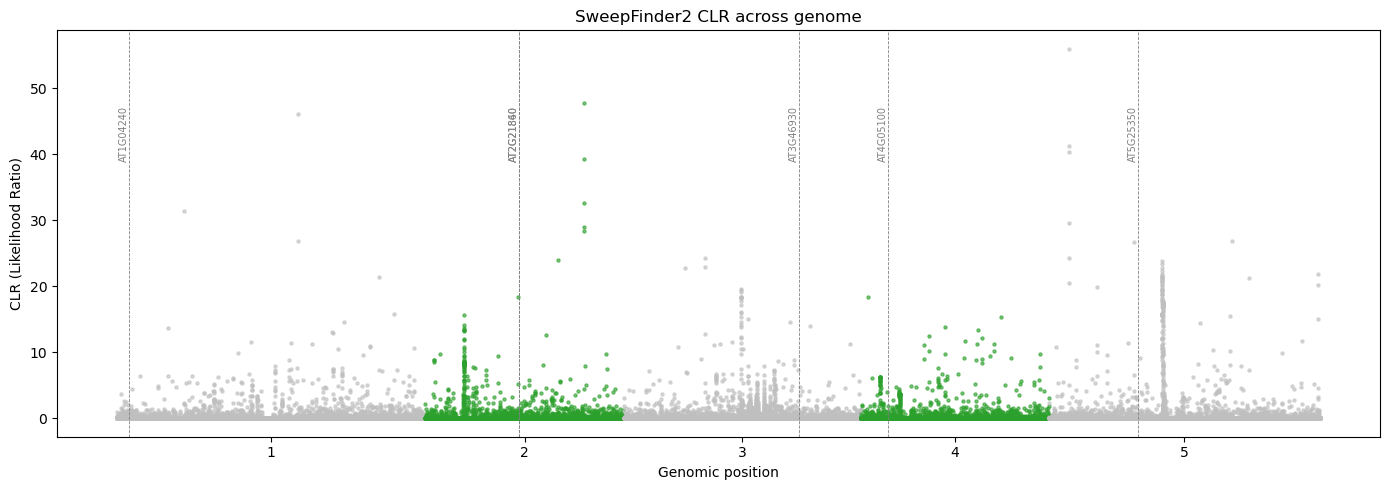

In [12]:

plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(sweep_df.groupby('chrom')):
    plt.scatter(group['pos_cum'], group['LR'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {chrom}')

# X-axis ticks by chromosome midpoint
xticks = sweep_df.groupby('chrom')['pos_cum'].median()
xtick_labels = sweep_df.groupby('chrom')['chrom'].first()
plt.xticks(ticks=xticks, labels=xtick_labels)

plt.xlabel('Genomic position')
plt.ylabel('CLR (Likelihood Ratio)')
plt.title('SweepFinder2 CLR across genome')
plt.tight_layout()

# === Annotate gene positions ===
for _, row in genes_df.iterrows():
    chrom = str(row['chrom'])
    gene_start = row['start']
    gene_end = row['end']
    gene_id = row['gene_id']
    gene_center = (gene_start + gene_end) // 2

    # Compute cumulative offset
    offset = sum(chrom_lengths[str(c)] for c in chroms if int(c) < int(chrom))
    gene_pos_cum = gene_center + offset

    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)
    plt.text(gene_pos_cum - 5e5, sweep_df['LR'].max() * 0.7, gene_id,
             rotation=90, fontsize=7, color='grey', ha='center')

plt.show()


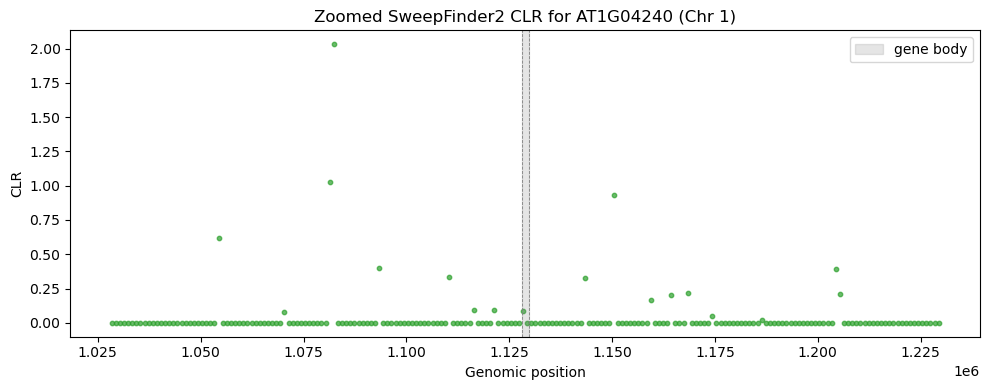

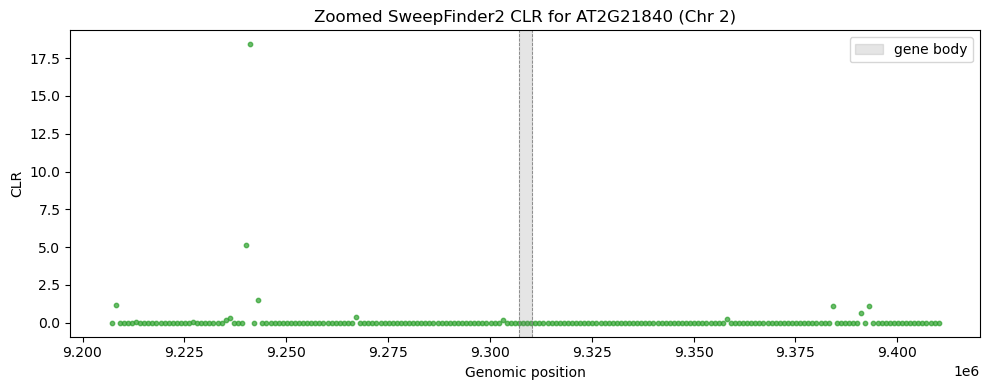

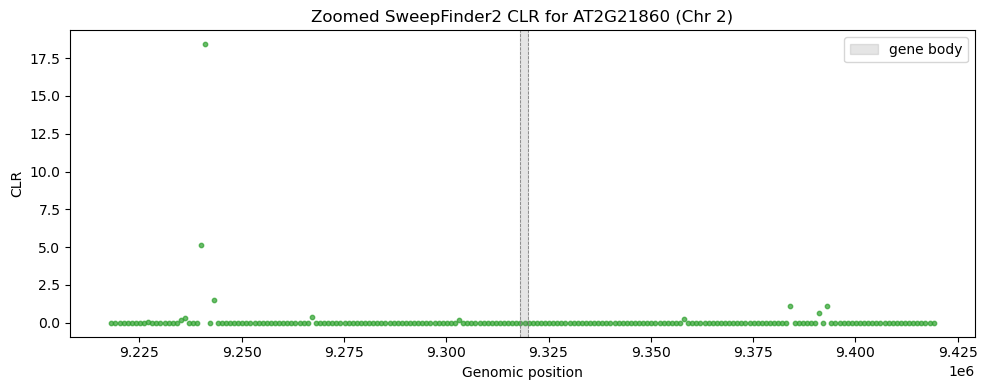

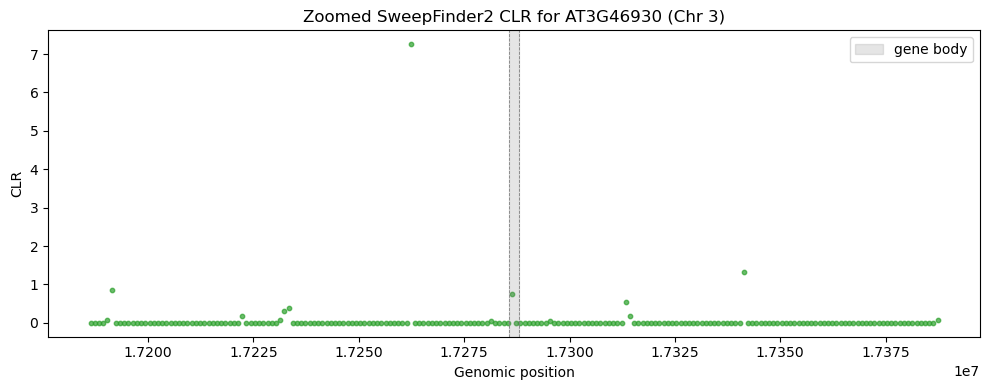

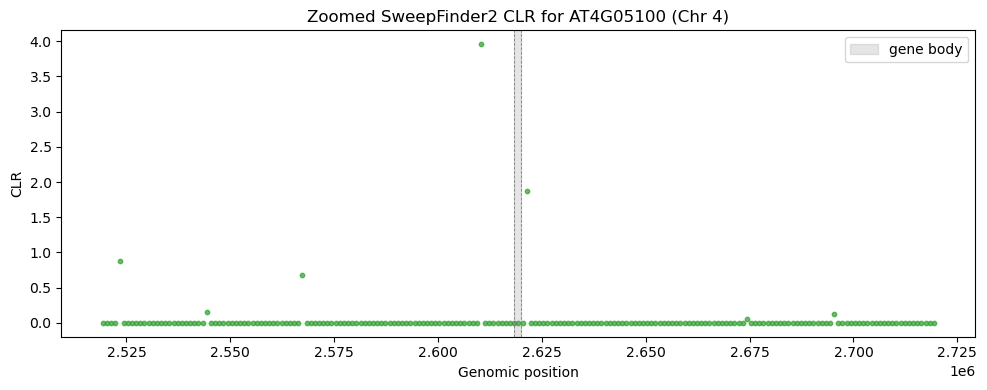

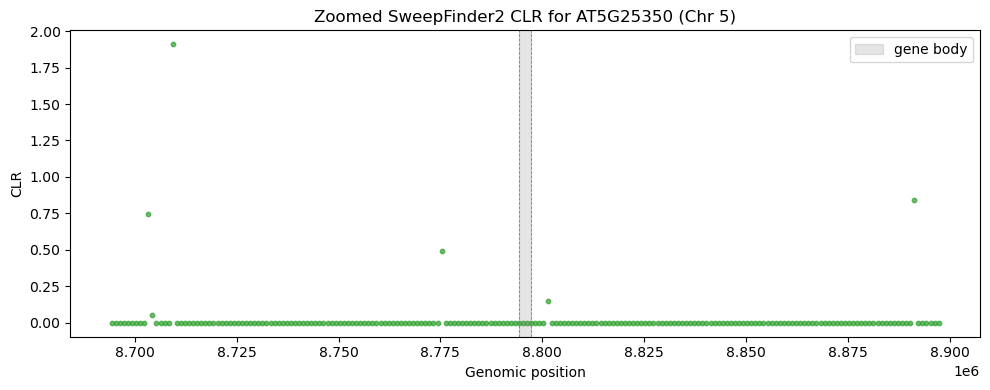

In [13]:
import matplotlib.pyplot as plt

for _, row in genes_df.iterrows():
    chrom = str(row['chrom'])  # Make sure it's a string to match `sweep_df`
    gene_start = row['start']
    gene_end = row['end']
    gene_id = row['gene_id']

    # Subset region ±100 kb around the gene
    region_df = sweep_df[
        (sweep_df['chrom'] == chrom) &
        (sweep_df['location'] >= gene_start - 100_000) &
        (sweep_df['location'] <= gene_end + 100_000)
    ]

    if region_df.empty:
        continue  # Skip if no data in the region

    # Plot
    plt.figure(figsize=(10, 4))
    plt.scatter(region_df['location'], region_df['LR'], s=10, alpha=0.7, color='#2ca02c')

    # Gene body highlight
    plt.axvspan(gene_start, gene_end, color='grey', alpha=0.2, label='gene body')
    plt.axvline(gene_start, color='grey', linestyle='--', linewidth=0.6)
    plt.axvline(gene_end, color='grey', linestyle='--', linewidth=0.6)

    # Labels
    plt.title(f'Zoomed SweepFinder2 CLR for {gene_id} (Chr {chrom})')
    plt.xlabel('Genomic position')
    plt.ylabel('CLR')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:


# === Combine into one DataFrame ===
sweep_df = pd.concat(sweep_all, ignore_index=True)

# === Manhattan-style plot ===
plt.figure(figsize=(14, 5))
colors = ['#bfbfbf', '#2ca02c']

for i, (chrom, group) in enumerate(sweep_df.groupby('chrom')):
    plt.scatter(group['pos_cum'], group['CLR'], s=5, alpha=0.6, color=colors[i % 2], label=f'Chr {chrom}')

# X-axis ticks by chromosome midpoint
xticks = sweep_df.groupby('chrom')['pos_cum'].median()
xtick_labels = sweep_df.groupby('chrom')['chrom'].first()
plt.xticks(ticks=xticks, labels=xtick_labels)

plt.xlabel('Genomic position')
plt.ylabel('CLR (Composite Likelihood Ratio)')
plt.title('SweepFinder2 CLR values across genome')
plt.tight_layout()

# === Annotate gene positions ===
for _, row in genes_df.iterrows():
    chrom = str(row['chrom'])
    gene_start = row['start']
    gene_end = row['end']
    gene_id = row['gene_id']
    gene_center = (gene_start + gene_end) // 2

    # Get cumulative offset
    offset = sum(chrom_lengths[str(c)] for c in chroms if int(c) < int(chrom))
    gene_pos_cum = gene_center + offset

    plt.axvline(gene_pos_cum, color='grey', linestyle='--', linewidth=0.6)
    plt.text(gene_pos_cum - 5e5, sweep_df['CLR'].max() * 0.7, gene_id,
             rotation=90, fontsize=7, color='grey', ha='center')

plt.show()
